In [1]:
const openDigger = require('../../src/open_digger')
const query = openDigger.driver.clickhouse.query
const plot = openDigger.render.plotly

In [2]:
let repo_id = 31792824

In [3]:
query('select count() from github_log.events')

[ { 'count()': '168182942' } ]

┌─────────┬───────────┬────────┬───────┐
│ (index) │   date    │ stars  │ forks │
├─────────┼───────────┼────────┼───────┤
│    0    │ '2015-3'  │  '13'  │  '1'  │
│    1    │ '2015-4'  │  '32'  │  '2'  │
│    2    │ '2015-5'  │ '1918' │ '164' │
│    3    │ '2015-6'  │  '75'  │ '14'  │
│    4    │ '2015-7'  │  '62'  │ '10'  │
│    5    │ '2015-8'  │  '5'   │  '1'  │
│    6    │ '2015-9'  │  '4'   │  '1'  │
│    7    │ '2015-10' │  '11'  │  '1'  │
│    8    │ '2015-11' │ '372'  │ '51'  │
│    9    │ '2015-12' │ '153'  │ '13'  │
│   10    │ '2016-1'  │ '124'  │ '17'  │
│   11    │ '2016-2'  │  '76'  │ '14'  │
│   12    │ '2016-3'  │  '86'  │ '14'  │
│   13    │ '2016-4'  │  '38'  │ '11'  │
│   14    │ '2016-5'  │  '78'  │ '22'  │
│   15    │ '2016-6'  │ '115'  │ '10'  │
│   16    │ '2016-7'  │  '54'  │  '8'  │
│   17    │ '2016-8'  │ '248'  │ '37'  │
│   18    │ '2016-9'  │ '120'  │ '10'  │
│   19    │ '2016-10' │ '173'  │ '10'  │
│   20    │ '2016-11' │ '166'  │ '31'  │
│   21    │ '201

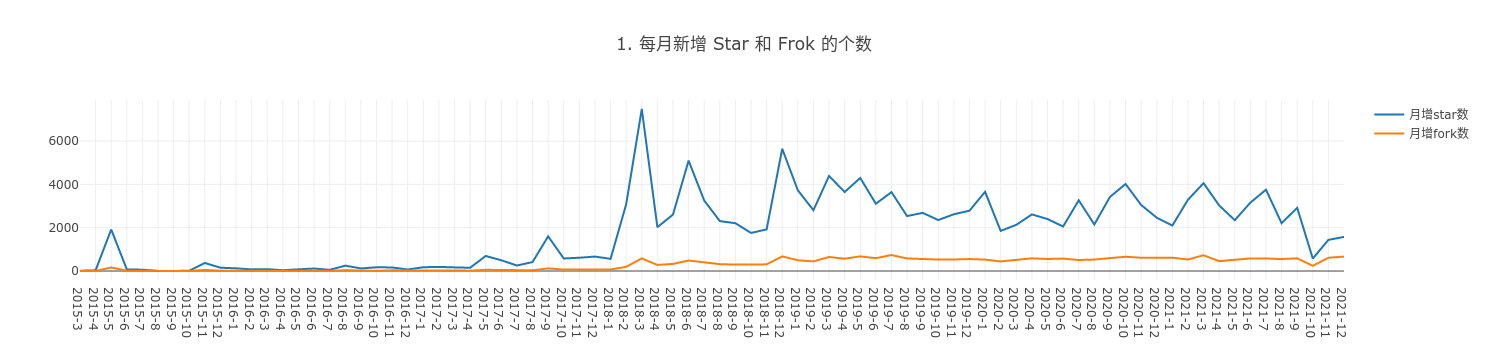

In [4]:
// 1. 每月新增 Star 和 Frok 的个数
(async () => {
    let data = (await query(`
        select
            toYear(created_at) year, toMonth(created_at) month,
            count(type = 'ForkEvent' OR NULL) as forks,
            count(type = 'WatchEvent' OR NULL) as stars
        from github_log.events
        where repo_id = ${repo_id} and created_at < toDateTime('2022-01-01 00:00:00')
        group by year, month
        order by year, month
    `)).map(row => ({
        date: `${row.year}-${row.month}`,
        stars: row.stars,
        forks: row.forks
    }))
    console.table(data)

    let [date, stars, forks] = Object.keys(data[0]).map(k => data.map(row => row[k]))
    plot([
        {x: date, y: stars, mode: 'scatter', name: '月增star数'},
        {x: date, y: forks, mode: 'scatter', name: '月增fork数'}
    ], {
        title: '1. 每月新增 Star 和 Frok 的个数',
        xaxis: {type: 'category'}
    })
})();

┌─────────┬───────────┬────────┬────────┐
│ (index) │   date    │ opens  │ closes │
├─────────┼───────────┼────────┼────────┤
│    0    │ '2015-4'  │  '3'   │  '0'   │
│    1    │ '2015-5'  │  '9'   │  '5'   │
│    2    │ '2015-6'  │  '2'   │  '3'   │
│    3    │ '2015-7'  │  '1'   │  '1'   │
│    4    │ '2015-11' │ '410'  │ '122'  │
│    5    │ '2015-12' │ '212'  │ '134'  │
│    6    │ '2016-1'  │ '249'  │ '142'  │
│    7    │ '2016-2'  │ '479'  │ '311'  │
│    8    │ '2016-3'  │ '400'  │ '278'  │
│    9    │ '2016-4'  │ '339'  │ '216'  │
│   10    │ '2016-5'  │ '365'  │ '245'  │
│   11    │ '2016-6'  │ '275'  │ '181'  │
│   12    │ '2016-7'  │ '233'  │ '121'  │
│   13    │ '2016-8'  │ '299'  │ '173'  │
│   14    │ '2016-9'  │ '255'  │ '265'  │
│   15    │ '2016-10' │ '216'  │ '195'  │
│   16    │ '2016-11' │ '269'  │ '182'  │
│   17    │ '2016-12' │ '126'  │  '77'  │
│   18    │ '2017-1'  │ '188'  │ '298'  │
│   19    │ '2017-2'  │ '337'  │ '397'  │
│   20    │ '2017-3'  │ '312'  │ '

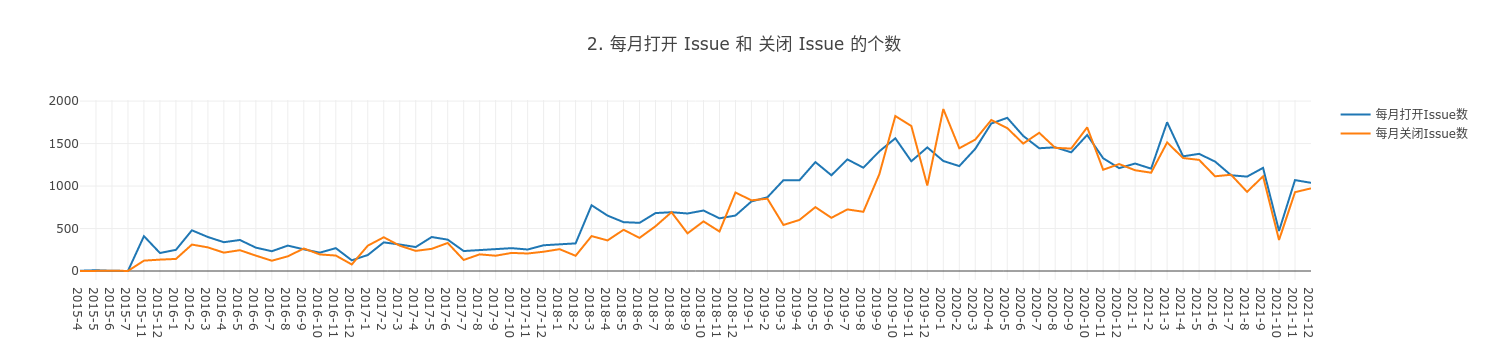

In [5]:
// 2. 每月打开 Issue 和 关闭 Issue 的个数
(async () => {
    let data = (await query(`
        select
            toYear(created_at) year, toMonth(created_at) month,
            count(action = 'opened' OR NULL) as opens,
            count(action = 'closed' OR NULL) as closes
        from github_log.events
        where repo_id = ${repo_id} and created_at < toDateTime('2022-01-01 00:00:00') and type = 'IssuesEvent'
        group by year, month
        order by year, month
    `)).map(row => ({
        date: `${row.year}-${row.month}`,
        opens: row.opens,
        closes: row.closes
    }))
    console.table(data)

    let [date, opens, closes] = Object.keys(data[0]).map(k => data.map(row => row[k]))
    plot([
        {x: date, y: opens, mode: 'scatter', name: '每月打开Issue数'},
        {x: date, y: closes, mode: 'scatter', name: '每月关闭Issue数'}
    ], {
        title: '2. 每月打开 Issue 和 关闭 Issue 的个数',
        xaxis: {type: 'category'}
    })
})();

┌─────────┬───────────┬───────┬────────┐
│ (index) │   date    │ opens │ merges │
├─────────┼───────────┼───────┼────────┤
│    0    │ '2015-3'  │  '1'  │  '0'   │
│    1    │ '2015-4'  │  '2'  │  '0'   │
│    2    │ '2015-5'  │  '9'  │  '0'   │
│    3    │ '2015-6'  │  '0'  │  '0'   │
│    4    │ '2015-11' │ '201' │ '187'  │
│    5    │ '2015-12' │ '199' │ '186'  │
│    6    │ '2016-1'  │ '196' │ '185'  │
│    7    │ '2016-2'  │ '297' │ '282'  │
│    8    │ '2016-3'  │ '355' │ '331'  │
│    9    │ '2016-4'  │ '285' │ '278'  │
│   10    │ '2016-5'  │ '264' │ '252'  │
│   11    │ '2016-6'  │ '238' │ '220'  │
│   12    │ '2016-7'  │ '128' │ '120'  │
│   13    │ '2016-8'  │ '227' │ '205'  │
│   14    │ '2016-9'  │ '207' │ '200'  │
│   15    │ '2016-10' │ '230' │ '216'  │
│   16    │ '2016-11' │ '232' │ '218'  │
│   17    │ '2016-12' │ '79'  │  '71'  │
│   18    │ '2017-1'  │ '257' │ '237'  │
│   19    │ '2017-2'  │ '371' │ '337'  │
│   20    │ '2017-3'  │ '337' │ '327'  │
│   21    │ '201

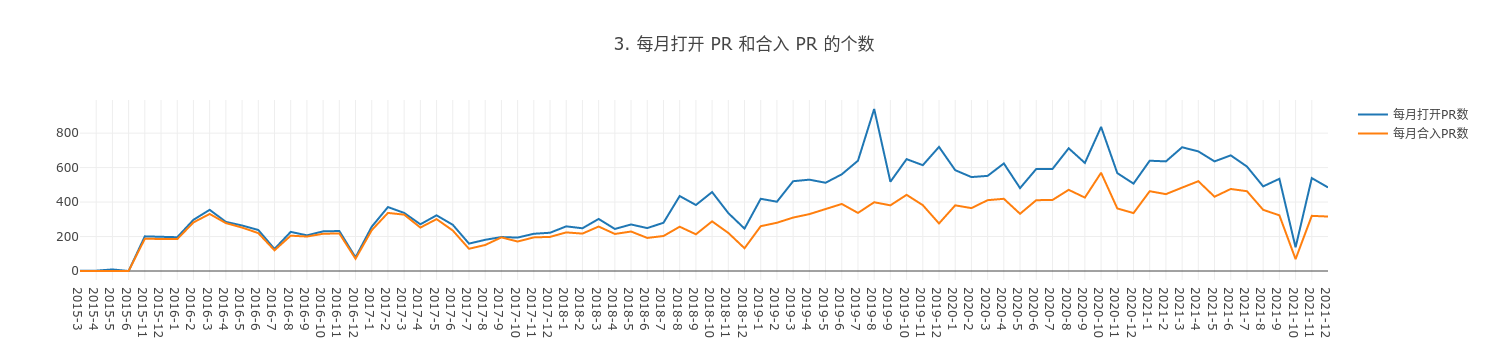

In [6]:
// 3. 每月打开 PR 和合入 PR 的个数（注意，关闭 PR 不等于合入）
(async () => {
    let data = (await query(`
        select
            toYear(created_at) year, toMonth(created_at) month,
            count(action = 'opened' OR NULL) as opens,
            count((action = 'closed' and pull_merged = 1) OR NULL) as merges
        from github_log.events
        where repo_id = ${repo_id} and created_at < toDateTime('2022-01-01 00:00:00') and type = 'PullRequestEvent'
        group by year, month
        order by year, month
    `)).map(row => ({
        date: `${row.year}-${row.month}`,
        opens: row.opens,
        merges: row.merges
    }))
    console.table(data)

    let [date, opens, merges] = Object.keys(data[0]).map(k => data.map(row => row[k]))
    plot([
        {x: date, y: opens, mode: 'scatter', name: '每月打开PR数'},
        {x: date, y: merges, mode: 'scatter', name: '每月合入PR数'}
    ], {
        title: '3. 每月打开 PR 和合入 PR 的个数',
        xaxis: {type: 'category'}
    })
})();

┌─────────┬───────────┬────────┐
│ (index) │   date    │ users  │
├─────────┼───────────┼────────┤
│    0    │ '2015-3'  │  '17'  │
│    1    │ '2015-4'  │  '37'  │
│    2    │ '2015-5'  │ '2025' │
│    3    │ '2015-6'  │  '85'  │
│    4    │ '2015-7'  │  '72'  │
│    5    │ '2015-8'  │  '6'   │
│    6    │ '2015-9'  │  '6'   │
│    7    │ '2015-10' │  '13'  │
│    8    │ '2015-11' │ '436'  │
│    9    │ '2015-12' │ '201'  │
│   10    │ '2016-1'  │ '178'  │
│   11    │ '2016-2'  │ '133'  │
│   12    │ '2016-3'  │ '148'  │
│   13    │ '2016-4'  │ '107'  │
│   14    │ '2016-5'  │ '147'  │
│   15    │ '2016-6'  │ '170'  │
│   16    │ '2016-7'  │ '103'  │
│   17    │ '2016-8'  │ '335'  │
│   18    │ '2016-9'  │ '195'  │
│   19    │ '2016-10' │ '256'  │
│   20    │ '2016-11' │ '265'  │
│   21    │ '2016-12' │ '155'  │
│   22    │ '2017-1'  │ '273'  │
│   23    │ '2017-2'  │ '298'  │
│   24    │ '2017-3'  │ '292'  │
│   25    │ '2017-4'  │ '259'  │
│   26    │ '2017-5'  │ '862'  │
│   27    

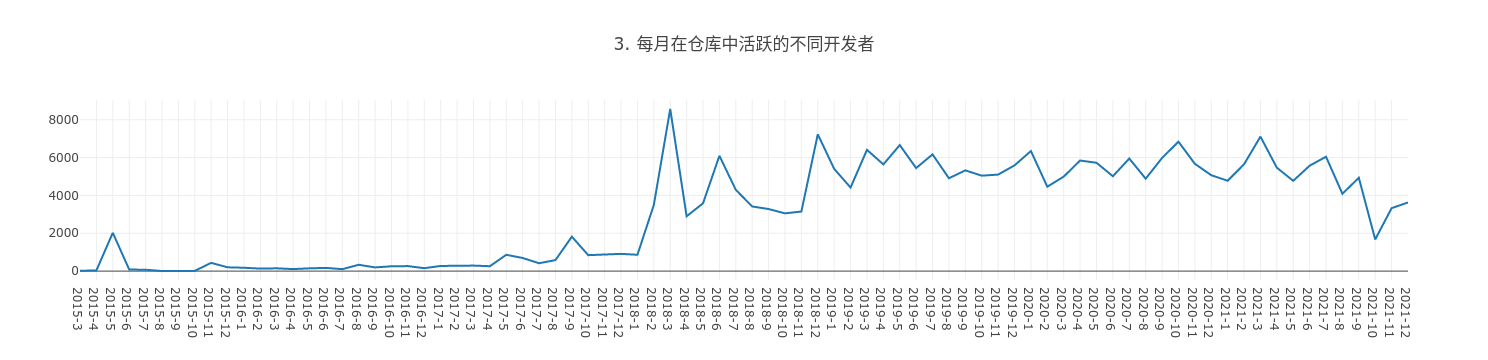

In [7]:
// 4. 每月在仓库中活跃（只要有日志产生就算）的不同开发者（也就是一个GitHub账号）总数
(async () => {
    let data = (await query(`
        select
            toYear(created_at) year, toMonth(created_at) month,
            count(distinct actor_id) users
        from github_log.events
        where repo_id = ${repo_id} and created_at < toDateTime('2022-01-01 00:00:00')
        group by year, month
        order by year, month
    `)).map(row => ({
        date: `${row.year}-${row.month}`,
        users: row.users
    }))
    console.table(data)

    let [date, users] = Object.keys(data[0]).map(k => data.map(row => row[k]))
    plot([
        {x: date, y: users, mode: 'scatter', name: '该月活跃开发者总数'}
    ], {
        title: '3. 每月在仓库中活跃的不同开发者',
        xaxis: {type: 'category'}
    })
})();

In [8]:
// 5. Issue 从打开到关闭的平均时长和中位数（单位：天）
(async () => {
    return query(`
        select
            avg(day) as avg,
            quantile(0.5)(day) as median
        from (
            select issue_number, dateDiff('day', issue_created_at, issue_closed_at) day
            from github_log.events
            where repo_id = '${repo_id}' and created_at < toDateTime('2022-01-01 00:00:00') and type = 'IssuesEvent' and action = 'closed'
        )
    `)
})()

[ { avg: 90.15947321823816, median: 6 } ]

In [9]:
// 6. PR 从打开到合入的平均时长和中位数（单位：天）
(async () => {
    return query(`
        select
            avg(day) as avg,
            quantile(0.5)(day) as median
        from (
            select issue_number, dateDiff('day', issue_created_at, pull_merged_at) day
            from github_log.events
            where repo_id = '${repo_id}' and created_at < toDateTime('2022-01-01 00:00:00') and type = 'PullRequestEvent' and action = 'closed' and pull_merged
        )
    `)
})()

[ { avg: 3.4037030314031584, median: 0 } ]

In [10]:
// 7. Issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）
(async () => {
    return query(`
        select
            avg(first_comment) as avg,
            quantile(0.5)(first_comment) as median
        from (
            select issue_number, min(dateDiff('day', issue_created_at, issue_comment_created_at)) as first_comment
            from github_log.events
            where repo_id = '${repo_id}' and created_at < toDateTime('2022-01-01 00:00:00') and type = 'IssueCommentEvent' and issue_author_id != issue_comment_author_id
            group by issue_number
        )
    `)
})()

[ { avg: 90.8973257906917, median: 0 } ]